# PC-Lab 9: Support Vector Machines

## Introduction

Support vector machines (SVMs) are (still) among the most popular techniques used for classification and regression. SVM is like a gifted artist, seeing the world not just for what it is, but for the potential spaces in between. It asks a fundamental question: "Given these points, where should the line (or plane, or hyperplane) be drawn to best separate them?" In mathematical terms, it tries to find a hyperplane that maximizes the margin between two classes. 

But the true genius of SVM reveals itself in non-linear situations. 
As these methods only use instances as products of the feature vectors, they can be kernelized by means of the kernel trick:

\begin{align}
k(\mathbf{x_i},\mathbf{x_j}) &= \phi(\mathbf{x_i})^T\phi(\mathbf{x_j}). 
\end{align}

SVMs are what people call a _maximum margin classifier_, as it can be shown that the mathematical framework of an SVM maximizes the distance between the decision boundary and the instances closest to the boundary. In addition, they are considered sparse methods because after the training phase a part of the data set can usually be discarded, retaining only the _support vectors_. 

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/72/SVM_margin.png/1920px-SVM_margin.png" width=500>

Technically, the SVM tries to maximize the margin $M$, while retaining an optimal classification error. As is shown in theory lecture, the first is equal to $||\mathbf{w}||^{-1}$ and so this is equivalent to minimizing: 
\begin{equation}
    \text{arg min} \frac{1}{2} ||\mathbf{w} + w_0||^2, 
\end{equation}

subject to: 
\begin{equation}
    y_i(\mathbf{x}^T(\mathbf{w} + w_0)) \geq 1, \qquad \forall i =  1, ..., n. 
\end{equation}

However, this implementation only works for data that is separable. By allowing misclassifications one can turn the margin classifier into the well-known SVM by introducing slack variables $\xi_i$: 
\begin{equation}
    \text{arg min}_{\mathbf{w} + w_0} \{ \frac{1}{2} ||\mathbf{w} + w_0||^2 + C \sum_{i=1}^n \xi_i \}, 
\end{equation}

subject to: 
\begin{equation}
    y_i(\mathbf{x}^T(\mathbf{w}+w_0)) \geq 1-\xi_i, \qquad \forall i =  1, ..., n. 
\end{equation}

The above formulation can be translated to an equivalent _dual representation_, which leads to the following maximization problem:
\begin{equation}
    \text{arg max}_{a_i} \{ \sum_{i=1}^n a_i - \frac{1}{2} \sum_{i=1}^n \sum_{k=1}^n a_i a_k y_i y_k \mathbf{x_i}^{T}\mathbf{x_k} \}, 
\end{equation}

subject to: 
\begin{align}
    0 \leq a_i &\leq C, \\
    \sum_{i=1}^n a_iy_i &= 0, \qquad \forall i = 1, ..., n, 
\end{align}

Due to the dot products in the above formulation, we can apply the **kernel trick**, which then gives us the final maximization problem:
\begin{equation}
    \text{arg max}_{a_i} \{ \sum_{i=1}^n a_i - \frac{1}{2} \sum_{i=1}^n \sum_{k=1}^n a_i a_k y_i y_k k(\mathbf{x_i},\mathbf{x_k}) \}, 
\end{equation}

subject to: 
\begin{align}
    0 \leq a_i &\leq C, \\
    \sum_{i=1}^n a_iy_i &= 0, \qquad \forall i = 1, ..., n, 
\end{align}

where $k$ is defined as the kernel function. 

In this PC-lab we will use SVMs for both classification and regression purposes. In the first part we will predict the label of two bacterial species  based on flow cytometry data. Next, we will try to predict the molecular function of a set of proteins by using only its amino acid sequence by using a customized spectral kernel. Finally, support vector regression (SVR) will be used to have a second attempt at the prediction of the strength of concrete. 

## Grid search vs. randomized grid search

<img src="https://miro.medium.com/v2/format:webp/1*ZTlQm_WRcrNqL-nLnx6GJA.png" width=600>

SVMs typically contain multiple hyperparameters. First of all there is the penalty of regularization (often noted as $C$ for SVMs, equivalent to $1/\lambda$ previously seen in theory). Second there is a kernel to choose, and depending on the kernel, there can be one (or sometimes more) hyperparameters to tune (often denoted with a $\gamma$). One can even include the type of kernel as a hyperparameter. It is straightforward to note that the computational time of training a model increases exponentially with the number of hyperparameters that needs to be  tuned. 

Two searches are often proposed to tune a machine learning model in function of its hyperparameters: 
- the first considers an exhaustive and structured search in the full hyperparameter space; 
- the second applies random combinations of hyperparameter settings. 

[It has been shown that when only few hyperparameters have an impact on model performance a randomized grid search is preferred. ](http://www.jmlr.org/papers/volume13/bergstra12a/bergstra12a.pdf) 

`Scikit-learn` offers implementations of [both](http://scikit-learn.org/stable/modules/grid_search.html), of which we will compare the use in this PC-lab. 

## Support vector classification of microbial flow cytometry data

#### Dataset
We will have a second look at the flow cytometry dataset. The 'SC' features measure scatter, and say something about the morphologhy of the cells (FSC: forward scatter, SSC: sideway scatter). The 'FL' features are fluorescence features from different parts of the spectrum. Two bacterial species have been measured separately, _Shewanella oneidensis_ and _Sphingomonas aromaticivorans_, labelled 1 and 0 respectively. Scikit-learn provides [various implementations of SVMs](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.svm), which we will use to analyze this dataset. 

<div class="alert alert-success">
<h1>EXERCISE 9.1</h2>
<p><b>
a) Read in the data from the files `fc_train` and `fc_test`. Often, before flow cytometry data can be analyzed, mathematical transformations are applied to for example visualize the data. Therefore we first need to preprocess the data by performing an $\text{arcsinh}(x)$ transformation and normalization (or standardization). Why do we need to normalize for SVMs? Sample 10% of the train data (due to long runtimes) and perform the suggested preprocessing steps. 

b) Fit and optimize a SVM with a linear kernel to the training data. The 'species' label denotes the target to predict, you can ignore the 'Width' and 'Time' feature. Evaluate the performance on the test set, for different values of the regularization parameter. What's the 'optimal' performance of this model? Which hyperparameter setting goes along with this? What does this mean? 

c) Explore other kernels to tackle this dataset. Find optimal hyperparameters using a grid search. 

d) Another possibility is to use a randomized grid search. How long did previous exercise take? How long does a randomized grid search take before you reach the same performance? What do you prefer? 

e) What would be an alternative option to tune your model? 
</b>
</div>

In [8]:
import numpy as np
import urllib.request

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.svm import SVR

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from IPython.display import display, HTML

plt.style.use('seaborn-v0_8')

Download the data and read them into dataframes:

In [9]:
# load data
urllib.request.urlretrieve('https://raw.githubusercontent.com/BioML-UGent/MLLS/main/08_svms/fc_train.csv', 'fc_train.csv')
urllib.request.urlretrieve('https://raw.githubusercontent.com/BioML-UGent/MLLS/main/08_svms/fc_test.csv', 'fc_test.csv')  

# read data into pandas dataframe
df_train = pd.read_csv('fc_train.csv', header=0, index_col=0)
df_test = pd.read_csv('fc_test.csv', header=0, index_col=0)


##### 1a) Sample a fraction from the train data, perform the transformation, scale the data:

In [10]:

#Tip: np.arcsinh()
# sample 10 % of the train data (with replacement) for training: note: use 'species' as weights
fc_train = df_train.sample(frac=.1, weights='species', random_state=42)
# take all but 'Width', 'Time' and 'species' column names for features
features = fc_train.columns[:-3]
# take 'species' column as target
display(fc_train.head(5))

# transform data with arcsinh
fc_train_trans = np.arcsinh(fc_train[features])
fc_test_trans = np.arcsinh(df_test[features])

# scale data
scaler = StandardScaler()
# fitr to train data and transform train and test data
scaler.fit(fc_train_trans)
fc_train_scaled = scaler.transform(fc_train_trans)
fc_test_scaled = scaler.transform(fc_test_trans)

fc_train_scaled = pd.DataFrame(fc_train_scaled, columns=features)
fc_test_scaled = pd.DataFrame(fc_test_scaled, columns=features)

,FSC-A,SSC-A,FL1-A,FL2-A,FL3-A,FL4-A,FSC-H,SSC-H,FL1-H,FL2-H,FL3-H,FL4-H,Width,Time,species
5532,10981.0,1250.0,125945.0,22578.0,13324.0,870.0,29025.996094,2557.998779,120230.039062,21951.0,11193.998047,1616.0,68.0,188.0,7
9647,11463.0,3283.0,213755.0,42429.0,27720.0,0.0,23961.009766,3816.000732,199565.921875,39734.0,22274.005859,347.0,74.0,307.0,7
8085,5796.0,5472.0,162286.0,26598.0,12510.0,0.0,20137.996094,9281.000000,153533.015625,24781.0,11737.005859,229.0,69.0,609.0,7
7133,5296.0,2403.0,163095.0,30470.0,22930.0,0.0,24603.003906,4085.998535,150866.984375,27674.0,17582.001953,1601.0,72.0,212.0,7
2600,16234.0,4354.0,110271.0,15036.0,6059.0,557.0,46084.992188,5912.998535,112693.039062,15283.0,5568.002441,687.0,67.0,610.0,3


In [11]:
display(fc_test_scaled.head(5))

,FSC-A,SSC-A,FL1-A,FL2-A,FL3-A,FL4-A,FSC-H,SSC-H,FL1-H,FL2-H,FL3-H,FL4-H
0,-0.985406,-0.533315,0.863242,0.837270,0.576845,-1.104317,-1.172665,-0.781640,0.878910,0.903223,0.590659,0.333780
1,0.917216,0.354519,-0.026396,0.271587,1.225693,-1.104317,1.746210,0.649520,0.026573,0.306803,1.345458,0.448159
2,0.826282,0.706024,0.094759,0.188678,0.417619,-1.104317,1.366073,1.114534,0.183050,0.281718,0.540198,-2.190632
3,0.766880,1.196137,1.103736,1.139444,1.445694,1.207447,1.500251,2.300268,1.219181,1.258502,1.454078,1.405983
4,0.626092,0.202021,1.055239,0.821835,-0.143496,-1.104317,1.260492,-0.062854,1.195624,0.957773,-0.063155,0.637847


##### 1b) Fit and optimize an SVM

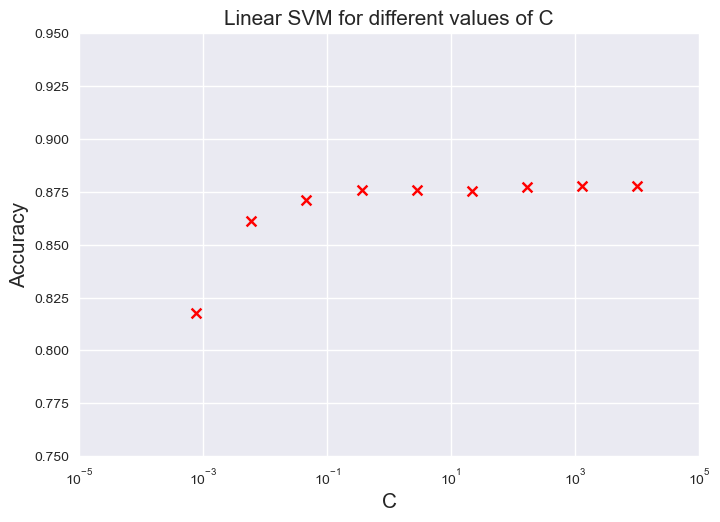

Performance Linear SVM: 0.8777
Optimal C: 10000.0


In [12]:
##1b): 
acc = np.zeros(10)
i=0
# iterate over different values for C
for c in np.logspace(-4,4,10): 

    svc = SVC(C=c,kernel='linear')
    svc.fit(fc_train_scaled[features],fc_train['species'])
    y_pred = svc.predict(fc_test_scaled[features])
    acc[i] = accuracy_score(df_test['species'],y_pred)
    i+=1
    
fig, ax = plt.subplots()
ax.scatter(np.logspace(-4,4,10), acc, c='r', marker='x', s=50)
ax.set_xlabel('C', size=15)
ax.set_ylabel('Accuracy', size=15)
ax.set_xscale('log')
ax.set_xlim(10**(-5),10**5)
ax.set_ylim(0.75,0.95)

plt.title('Linear SVM for different values of C', size=15)
plt.show()

print('Performance Linear SVM: ' + str(acc.max()))
print("Optimal C: " + str(np.logspace(-4,4,10)[acc.argmax()]))

#### 1c) perform GridSearch over c using other kernels
Use the scikit-learn class [both](http://scikit-learn.org/stable/modules/grid_search.html), optimize over the regularization strength as well as the kernel parameters

In [13]:
%%time
##1c): 
svc_gs = GridSearchCV(SVC(kernel='rbf'), param_grid={"C": np.logspace(-3,3,10),
 "gamma": np.logspace(-2, 2, 10)}, cv=3)
svc_gs.fit(fc_train_scaled[features],fc_train['species'])
y_pred = svc_gs.predict(fc_test_scaled[features])
acc_gs = accuracy_score(df_test['species'],y_pred)
print('Accuracy SVM with rbf-kernel after grid search: ' + str(acc_gs))

Accuracy SVM with rbf-kernel after grid search: 0.8948
CPU times: user 5.42 s, sys: 24.8 ms, total: 5.44 s
Wall time: 5.48 s


In [14]:
svc_gs.best_params_
print(f"Best parameters: {svc_gs.best_params_} with an accurcy of {acc_gs}")

Best parameters: {'C': 10.0, 'gamma': 0.027825594022071243} with an accurcy of 0.8948


In [15]:
%%time
#1d):
svc_rs = RandomizedSearchCV(SVC(kernel='rbf'), param_distributions={"C": np.logspace(-3,3,1000), 
"gamma": np.logspace(-3, 3, 1000)}, n_iter=50, cv=3)
svc_rs.fit(fc_train_scaled[features],fc_train['species'])
y_pred = svc_rs.predict(fc_test_scaled[features])
acc_rs = accuracy_score(df_test['species'],y_pred)

print('Accuracy SVM with rbf-kernel after randomized grid search: ' + str(acc_rs))

Accuracy SVM with rbf-kernel after randomized grid search: 0.8871
CPU times: user 2.94 s, sys: 16 ms, total: 2.96 s
Wall time: 2.98 s


In [16]:
print(f'Best parameters: {svc_rs.best_params_} with an accurcy of {acc_rs}')

Best parameters: {'gamma': 0.024064751500154243, 'C': 3.2174181506763717} with an accurcy of 0.8871


## Support Vector Machines with custom kernels

The only requirement for a valid kernel is that it is positive definite and symmetric. Therefore, it is possible to define a **kernel function over complex structures**, making kernel methods particularly useful in bioinformatics,
where the instances are often sequences, graphs, trees, molecules or texts, rather than vectors of fixed length. However, the use of these types of kernels can be computationally demanding. 

In this last part of the PC-lab we will use a _spectrum kernel_ for predicting the molecular function of a set of protein sequences. This kernel is based on the number of $k$-mers that two sequences have in common. Suppose that each sequence is denoted as $\mathbf{x_i} \in \Sigma^∗$ where $\Sigma$ is the alphabet of amino acids or nucleotides, depending on the application. A $k$-mer $\mathbf{a} \in \Sigma_k$ is a sequence of length $k$. The sequence $\mathbf{x_i}$ contains $\mathbf{a}$ iff $\mathbf{x_i} = \mathbf{uav}$ with $\boldsymbol{u}$, $\boldsymbol{v}$ being some other (possibly of lengtgh $0$) sequences.

Let $N(\mathbf{a}, \mathbf{x_i})$ be the number of times $\mathbf{a}$ appears in sequence $\mathbf{x_i}$. With this notation in mind, the _spectrum kernel function_ between two strings $\mathbf{x_i}$ and $\mathbf{x_j}$ is defined as:
\begin{equation}
    SK_k(\mathbf{x_i},\mathbf{x_j}) = \sum_{\mathbf{a} \in \Sigma_k} N(\mathbf{a},\mathbf{x_i}) \times N(\mathbf{a},\mathbf{x_j}). 
\end{equation}

This kernel is biased toward sequences that contain multiple instances of the same k-mer. This can easily be seen when considering a pair of sequences that contains the same $k$-mer twice. Such a pair gains a score of 4, while having two different $k$-mers in common only gives a score of 2. For this reason a normalized spectrum kernel can be used as alternative, defined as:
\begin{equation}
    NSK_k(\mathbf{x_i},\mathbf{x_j}) = \sum_{\mathbf{a} \in \Sigma_k} \text{min}\left( N(\mathbf{a},\mathbf{x_i}),N(\mathbf{a},\mathbf{x_j})\right). 
\end{equation}

The normalized kernel has an explicitly defined mapping $\phi(\mathbf{x})$. If the maximum length of the sequences is $n$, then $\phi(\mathbf{x})$ defines a map of $\mathbf{x} \in \Sigma^n$ to a feature space of dimension $|\Sigma^kn|$, where each dimension is indexed by a $k$-mer a and an integer $1 ≥ i ≥ n$. The mapping is as follows:
\begin{equation}
\phi_{(\mathbf{a},i)}(\mathbf{x}) = \left\{
    \begin{array}{ll}
        1 & \text{if $k$-mer $\mathbf{a}$ appears at least $i$ times in $\mathbf{x}$}, \\
        0 & \text{otherwise}. 
    \end{array}
\right.
\end{equation}

Using these two kernels, we will analyze 150 protein sequences and predict their functional label. Each molecule belongs either to the category `transport`, `glycosylation` or `signaling`. 

`Calculate (Normalized) Spectrum Kernel`: 

**Input**: Sequence 1, Sequence 2, $k$; 

**1. ** Find all possible substrings of length $k$ in sequence 1. 

**2. ** Find all possible substrings of length $k$ in sequence 2.

**3. ** Find common subset of substrings present in sequence 1 and sequence 2. 

**4. ** Count the number of times a specific substring is present in sequence 1 and 2 and calculate $SK$(sequence1,sequence2) or $NSK$(sequence1,sequence2) according to the formulas above. 

<div class="alert alert-success">
<h1> EXERCISE 9.2 </h2>
<p><b>
In attachment to this PC-lab, you can find two files called `Spectrum_Kernel.csv` and `Spectrum_Kernel_norm.csv`. The labels of the proteins can be found in the file `ProteinFunctionalLabels.txt`. These files contain the gram matrices generated according to the code above. 

a) What kind of classification problem is this? How can this problem be approached? 

b) Which kernel representation works better? Evaluate the spectrum kernels using a SVM. Use 70% of the data for training and 30% for testing. Think about the properties of your kernel matrices. How should those training and test sets be constructed? How should the kernel matrix be feeded to the SVM? Don't forget to tune the complexity parameter $C$. 
</b>
</div>

In [17]:
urllib.request.urlretrieve('https://raw.githubusercontent.com/BioML-UGent/MLLS/main/08_svms/Spectrum_Kernel.csv', 'Spectrum_Kernel.csv')
urllib.request.urlretrieve('https://raw.githubusercontent.com/BioML-UGent/MLLS/main/08_svms/Spectrum_Kernel_norm.csv', 'Spectrum_Kernel_norm.csv')
urllib.request.urlretrieve('https://raw.githubusercontent.com/BioML-UGent/MLLS/main/08_svms/ProteinFunctionalLabels.txt', 'ProteinFunctionalLabels.txt')


#Some preprocessing

spectrum_kernel = pd.read_csv('Spectrum_Kernel.csv', header=None, index_col=None)
spectrum_kernel_norm = pd.read_csv('Spectrum_Kernel_norm.csv', header=None, index_col=None)
labels = pd.read_table('ProteinFunctionalLabels.txt',header=None, index_col=None)
 
y = LabelEncoder().fit_transform(labels)
y = pd.DataFrame(y,dtype=int)

X_train, X_test, y_train, y_test = train_test_split(spectrum_kernel, y, train_size=0.7, stratify=y, 
                                                    random_state=5)
display(X_train.head(5))
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(spectrum_kernel_norm, y, 
                                                                        train_size=0.7, stratify=y,
                                                                          random_state=5)

X_train = X_train.iloc[:,X_train.index]
X_test = X_test.iloc[:,X_train.index]
X_train_norm = X_train_norm.iloc[:,X_train_norm.index]
X_test_norm = X_test_norm.iloc[:,X_train_norm.index]

display(X_train.head(5))

display(X_train_norm.head(5))

display(X_test.head(5))

/Users/mirajuergens/opt/miniconda3/envs/mlfls/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
118,14,17,14,4,19,13,18,27,15,20,...,5,17,39,10,35,33,23,16,18,13
78,33,39,47,11,15,46,12,55,15,24,...,21,18,56,20,50,73,16,26,30,17
148,30,51,41,9,37,39,39,67,14,29,...,27,22,77,23,69,77,30,35,460,30
74,33,57,59,11,44,58,42,93,25,49,...,37,44,101,26,87,118,50,50,52,28
3,6,12,3,91,9,3,9,14,3,7,...,12,5,9,7,8,19,7,9,9,6


,118,78,148,74,3,72,50,37,43,49,...,55,63,39,9,14,45,131,91,82,31
118,188,20,18,24,4,15,21,10,29,34,...,17,7,36,20,9,26,34,17,30,23
78,20,409,30,33,11,34,40,15,41,67,...,35,23,63,24,15,35,73,34,33,52
148,18,30,460,52,9,32,39,23,42,63,...,40,10,60,29,9,40,76,43,35,58
74,24,33,52,584,11,54,72,43,68,79,...,82,25,87,49,18,54,118,75,102,68
3,4,11,9,11,91,7,7,5,8,13,...,7,1,8,7,3,7,19,8,10,11


,118,78,148,74,3,72,50,37,43,49,...,55,63,39,9,14,45,131,91,82,31
118,180,19,18,22,4,15,18,9,23,25,...,14,7,31,19,9,24,30,15,26,19
78,19,383,27,29,10,32,35,15,33,51,...,32,22,54,24,14,32,53,31,31,44
148,18,27,438,47,7,31,31,22,36,54,...,36,9,54,28,9,34,64,38,30,47
74,22,29,47,530,10,50,63,36,57,65,...,63,22,73,41,16,46,89,68,89,58
3,4,10,7,10,89,7,7,5,8,13,...,6,1,8,6,3,7,16,8,10,8


,118,78,148,74,3,72,50,37,43,49,...,55,63,39,9,14,45,131,91,82,31
89,26,44,38,67,13,80,88,50,53,80,...,103,26,89,46,14,53,105,250,62,64
18,34,63,70,126,24,81,108,58,119,155,...,92,30,145,65,36,89,164,115,108,130
136,214,647,631,931,92,589,671,455,617,921,...,604,248,1099,469,276,699,2798,654,581,1553
57,6,24,26,49,12,33,34,21,50,55,...,29,10,66,23,14,40,64,36,30,37
144,35,50,69,87,8,57,76,57,80,93,...,73,27,131,58,25,97,185,61,71,114


#### 2 a) Tackle the classification problem using SVM. 
Tip: set kernel to 'precomputed' in the SVC class.
Again try different values for $C$.

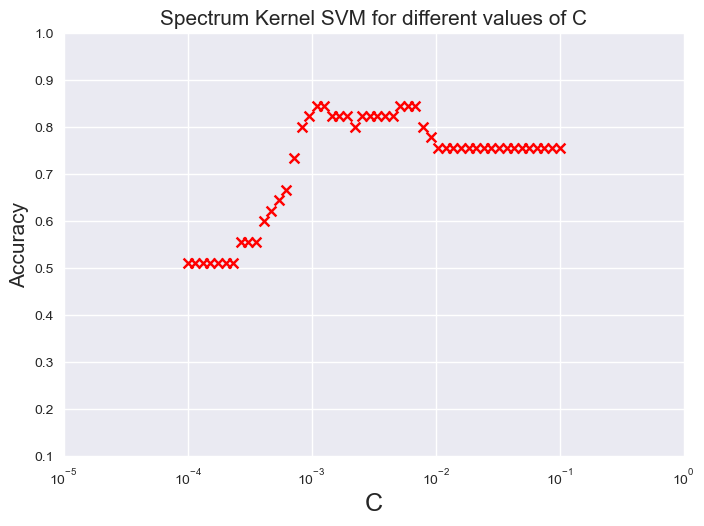

Protein label identification performance using Spectrum Kernel: 0.8444444444444444
Optimal C: 0.0010985411419875584


In [18]:
acc = np.zeros(50)
i=0
for c in np.logspace(-4,-1,50): 
    svc = SVC(C=c,kernel='precomputed',max_iter=500)
    svc.fit(X_train,y_train.values.ravel())
    y_pred = svc.predict(X_test)
    acc[i] = accuracy_score(y_test,y_pred)
    i+=1
        
fig, ax = plt.subplots()
ax.scatter(np.logspace(-4,-1,50), acc, c='r', marker='x', s=50)
ax.set_xlabel('C', size=18)
ax.set_ylabel('Accuracy', size=15)
ax.set_xscale('log')
ax.set_xlim(10**(-5),10**0)
ax.set_ylim(0.1,1)
plt.title('Spectrum Kernel SVM for different values of C', size=15)
plt.show()

print('Protein label identification performance using Spectrum Kernel: ' + str(acc.max()))
print("Optimal C: " + str(np.logspace(-4,-1,50)[acc.argmax()]))

Text(0.5, 1.0, 'Confusion matrix for Spectrum Kernel SVM')

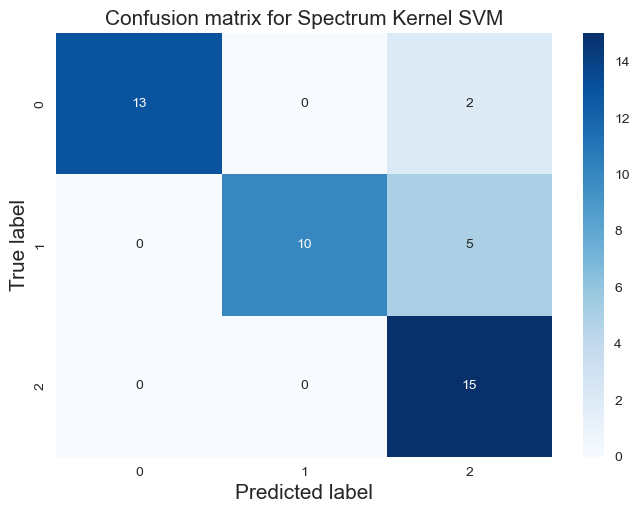

In [19]:
svc = SVC(C=0.001,kernel='precomputed',max_iter=1000)
svc.fit(X_train,y_train.values.ravel())
y_pred = svc.predict(X_test)
confusionmatrix = confusion_matrix(y_test.values.ravel(),y_pred)

sns.heatmap(confusionmatrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label', size=15)
plt.ylabel('True label', size=15)
plt.title('Confusion matrix for Spectrum Kernel SVM', size=15)

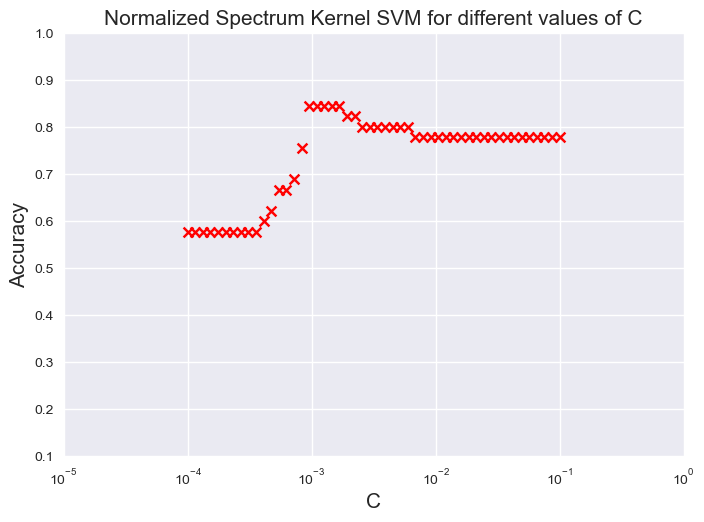

Protein label identification performance using Normalized Spectrum Kernel: 0.8444444444444444


In [20]:
acc_norm = np.zeros(50)
i=0
for c in np.logspace(-4,-1,50): 
    svc = SVC(C=c,kernel='precomputed',max_iter=1000)
    svc.fit(X_train_norm,y_train_norm.values.ravel())
    y_pred = svc.predict(X_test_norm)
    acc_norm[i] = accuracy_score(y_test_norm,y_pred)
    i+=1
    
        
fig, ax = plt.subplots()
ax.scatter(np.logspace(-4,-1,50), acc_norm, c='r', marker='x', s=50)
ax.set_xlabel('C', size=15)
ax.set_ylabel('Accuracy', size=15)
ax.set_xscale('log')
ax.set_xlim(10**(-5),10**0)
ax.set_ylim(0.1,1)
plt.title('Normalized Spectrum Kernel SVM for different values of C', size=15)
plt.show()

print('Protein label identification performance using Normalized Spectrum Kernel: ' + str(acc_norm.max()))

Text(0.5, 1.0, 'Confusion matrix for Normalized Spectrum Kernel SVM')

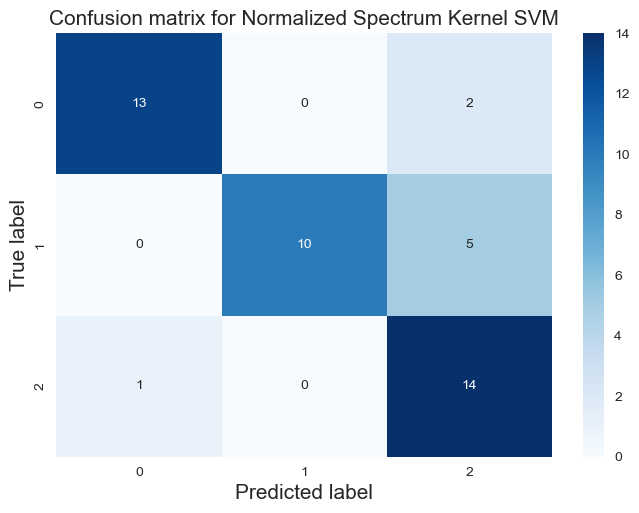

In [21]:
svc = SVC(C=0.001,kernel='precomputed',max_iter=1000)
svc.fit(X_train_norm,y_train_norm.values.ravel())
y_pred = svc.predict(X_test_norm)
confusion_matrix_norm = confusion_matrix(y_test_norm, y_pred)

sns.heatmap(confusion_matrix_norm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label', size=15)
plt.ylabel('True label', size=15)
plt.title('Confusion matrix for Normalized Spectrum Kernel SVM', size=15)

## Support vector regression

SVMs can also be adapted to be used for regression problems, using a so-called $\epsilon$-_insensitive error function_, which returns a zero error if the absolute difference between the prediction and target is less than $\epsilon$, with $\epsilon > 0$. If we note predictions for instance $i$ as $y_i^*$, we can write the error functions as follows: 
\begin{align}
E_\epsilon(y_i - y_i^*) &= 0, \quad \text{if} \quad |y_i - y_i^*| < \epsilon, \\
E_\epsilon(y_i - y_i^*) &=  |y_i - y_i^*| - \epsilon, \quad \text{otherwise}. 
\end{align}

As we now need two kinds of slack variables (why is that?), the mathematical optimization scheme now looks as follows: 

\begin{equation}
    \text{arg min}_{a_i,a_i^*} \{ \epsilon\sum_{i=1}^n (a_i+a_i^*) -  \frac{1}{2}\sum_{i=1}^n \sum_{k=1}^n (a_i-a_i^*) (a_k-a_k^*) K + \sum_{i=1}^n (a_i - a_i^*)y_i \} , 
\end{equation}

subject to: 
\begin{align}
    0 &\leq a_i, \\
    a_i^* &\leq C, \\
    \sum_{i=1}^n (a_i - a_i^*) &= 0, \\
    a_ia_i^* &= 0, \qquad \forall i = 1, ..., n.   
\end{align}

Alternative formulations of SVMs are also possible. One of them are called $\nu$-SVMs, where the amount of support vectors $\nu$ are controlled. Those interested can have a look [here](http://scikit-learn.org/stable/modules/generated/sklearn.svm.NuSVR.html#sklearn.svm.NuSVR). 

<div class="alert alert-success">
<h1>EXERCISE 9.3 (Optional)</h2>
<p><b>
We will have a second look at the `Concrete Compressive Strength` dataset. We are going to apply a [support vector regression model](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html) to the dataset. 

a) Which hyperparameters do you have in this setting? How would you optimize the model? 

b) Fit a support vector regression model to the data. Start with the rbf kernel. Evaluate your performance on a 30% held-out test set in terms of the mean squared error (MSE). Can you do better than kernel ridge regression? If the training takes too long, try to use a subsample of the data. 
</b>
</div>

In [22]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/BioML-UGent/MLLS/main/07_kernels/concreteComprStrength.txt", "concreteComprStrength.txt")

df = pd.read_table('concreteComprStrength.txt', delim_whitespace=True, header=0, index_col=None)
df = df.sample(frac=1)
features = ['cement', 'blastFurnaceSlag', 'flyAsh', 'water', 'superelastizer', 'coarseAggregate', 'fineAggregate', 'age']
target = ['compressiveStrength']

X_train, X_test, y_train, y_test = train_test_split(df.loc[:,features], df.loc[:,target],
                                                     test_size=0.50, random_state=85)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_stand = pd.DataFrame(scaler.transform(X_train), columns=features)
X_test_stand = pd.DataFrame(scaler.transform(X_test), columns=features)


In [23]:
svr_poly = RandomizedSearchCV(SVR(kernel='poly'),
                               param_distributions={"C": np.logspace(-3,3,10),
                                                                        "degree": [2,3,4,5,6,7,8,9,10],
                                                                          "epsilon": np.logspace(-2, 2, 10)}, 
                                                                          n_iter=300)
svr_rbf = RandomizedSearchCV(SVR(kernel='rbf'), 
                             param_distributions={"C": np.logspace(-3,3,10),                                                
                                                                   "gamma": np.logspace(-2, 2, 10), 
                                                                     "epsilon": np.logspace(-2, 2, 10)},
                                                                      n_iter=100)
svr_poly.fit(X_train_stand[features],y_train.values.ravel())
svr_rbf.fit(X_train_stand[features],y_train.values.ravel())
y_pred_poly = svr_poly.predict(X_test_stand[features])
y_pred_rbf = svr_rbf.predict(X_test_stand[features])
mse_poly = mean_squared_error(y_test,y_pred_poly)
mse_rbf = mean_squared_error(y_test,y_pred_rbf)

print('Mean squared error SVR polynomial kernel: ' + str(mse_poly))
print('MSE Kernel Ridge Regression using polynomial kernel: 31.36539126')
print('Mean squared error SVR rbf kernel: ' + str(mse_rbf))
print('MSE Kernel Ridge Regression using rbf kernel: 51.1696193149')

Mean squared error SVR polynomial kernel: 110.55070029125143
MSE Kernel Ridge Regression using polynomial kernel: 31.36539126
Mean squared error SVR rbf kernel: 37.16447844887724
MSE Kernel Ridge Regression using rbf kernel: 51.1696193149
